In [1]:
import sys

sys.path.append("..")

from Generators.Uniform_Generators.VanDerCorput import VanDerCorput
from Generators.Uniform_Generators.EcuyerCombined import EcuyerCombined
from Generators.Continuous_Generators.Normal import NormalBoxMuller
from Generators.Continuous_Generators.Exponential import ExponentialInverseDistribution
from Generators.Discrete_Generators.Poisson import PoissonSecondAlgo

import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

color_name_1 = "midnightblue"
color_1 = mcolors.CSS4_COLORS[color_name_1]
color_name_2 = "mediumblue"
color_2 = mcolors.CSS4_COLORS[color_name_2]

In [2]:
bases = (7, 11)
vdc_1 = VanDerCorput(bases[0])
vdc_2 = VanDerCorput(bases[1])
seeds_1 = (12345678, 98765432)
seeds_2 = (2345678, 8765432)

ecuyer_1 = EcuyerCombined(seeds_1)
ecuyer_2 = EcuyerCombined(seeds_2)

normal = NormalBoxMuller(0, 1, seeds_1, seeds_2)
exp = ExponentialInverseDistribution(1, seeds_1)
poisson = PoissonSecondAlgo(1, seeds_1)

n_sim = 800

In [3]:
#### Geneate Quasi-Random numbers using Van Der Corput ####
x_1 = [vdc_1.generate() for _ in range(n_sim)]
y_1 = [vdc_2.generate() for _ in range(n_sim)]

In [4]:
#### Geneate Pseudo-Random numbers using LecuyerCombined ####
x_2 = [ecuyer_1.generate() for _ in range(n_sim)]
y_2 = [ecuyer_2.generate() for _ in range(n_sim)]

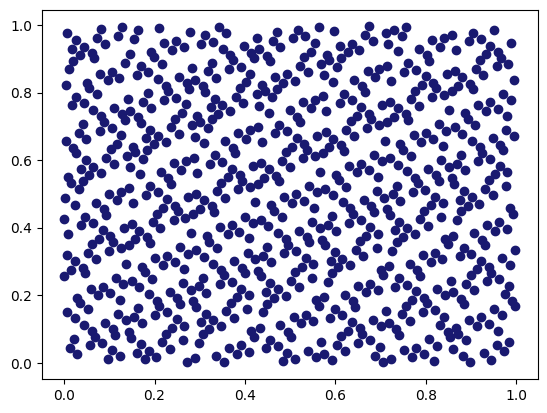

In [5]:
plt.scatter(x_1, y_1, color=color_1)
plt.show()

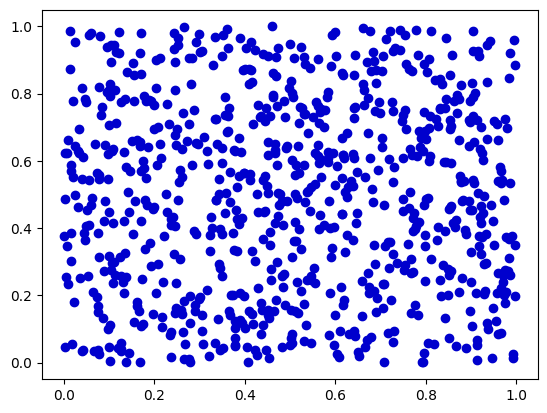

In [6]:
plt.scatter(x_2, y_2, color=color_2)
plt.show()

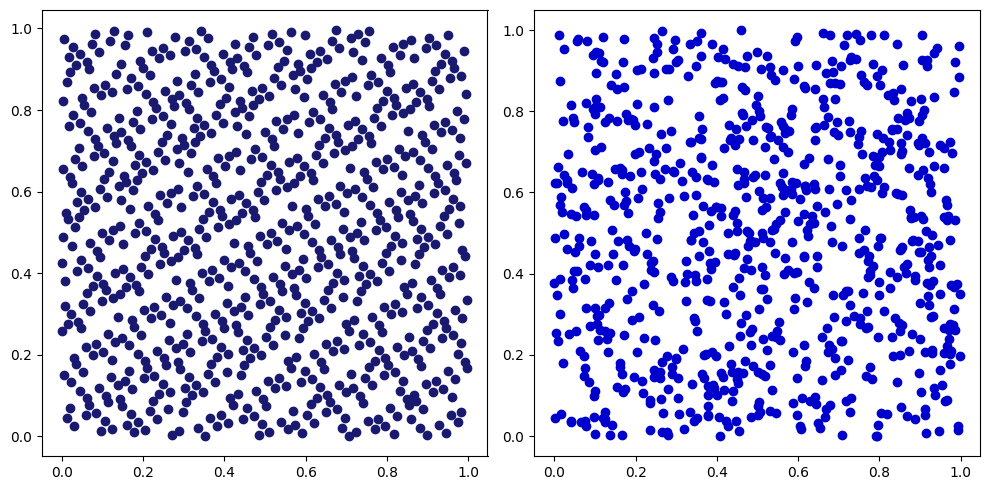

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Create the first scatter plot
axes[0].scatter(x_1, y_1, color=color_1, marker="o")
# Create the second scatter plot
axes[1].scatter(x_2, y_2, color=color_2, marker="o")
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

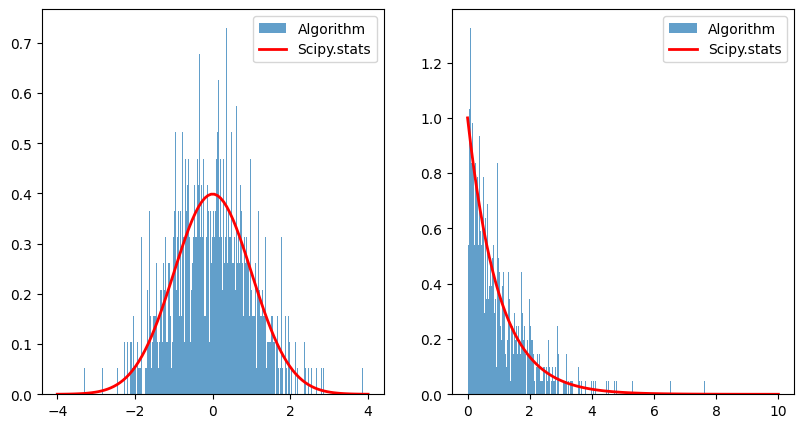

In [14]:
from scipy.stats import expon, norm
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data using your algorithm
np.random.seed(42)  # Set a seed for reproducibility
normal = NormalBoxMuller(0, 1).generate_sim(n_sim)
exp = ExponentialInverseDistribution(1).generate_sim(n_sim)

# Create figure and plot histograms for each distribution
plt.figure(figsize=(15, 5))

# Plot histogram for the normal distribution using scipy.stats
plt.subplot(1, 3, 1)
plt.hist(normal, bins=300, density=True, alpha=0.7, label="Algorithm")
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x, loc=0, scale=1), "r-", lw=2, label="Scipy.stats")
plt.legend()

# Plot histogram for the exponential distribution using scipy.stats
plt.subplot(1, 3, 2)
plt.hist(exp, bins=300, density=True, alpha=0.7, label="Algorithm")
x = np.linspace(0, 10, 100)
plt.plot(x, expon.pdf(x, scale=1), "r-", lw=2, label="Scipy.stats")
plt.legend()

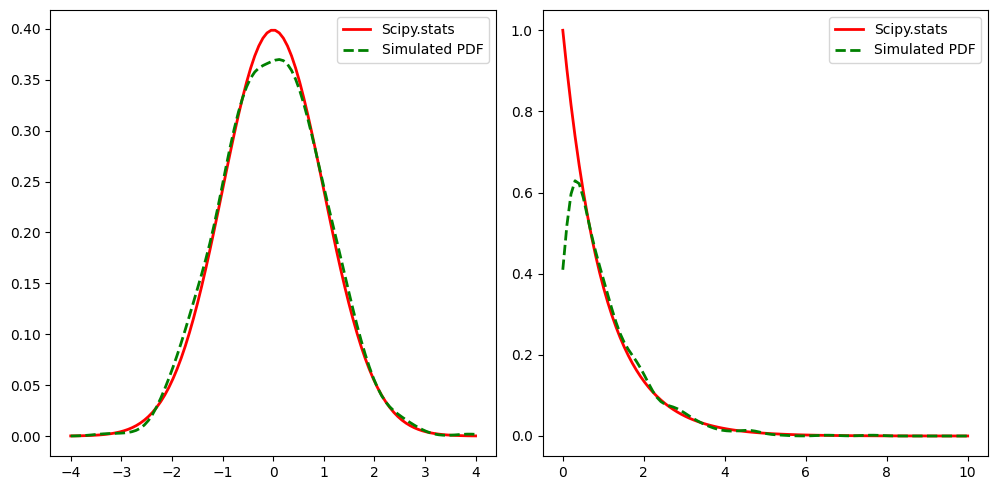

In [16]:
from scipy.stats import expon, norm, gaussian_kde
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data using your algorithm
np.random.seed(42)  # Set a seed for reproducibility
normal = NormalBoxMuller(0, 1).generate_sim(n_sim)
exp = ExponentialInverseDistribution(1).generate_sim(n_sim)


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x, loc=0, scale=1), "r-", lw=2, label="Scipy.stats")
kde_normal = gaussian_kde(normal)
plt.plot(x, kde_normal(x), "g--", lw=2, label="Simulated PDF")
plt.legend()

plt.subplot(1, 3, 2)
x = np.linspace(0, 10, 100)
plt.plot(x, expon.pdf(x, scale=1), "r-", lw=2, label="Scipy.stats")
kde_exp = gaussian_kde(exp)
plt.plot(x, kde_exp(x), "g--", lw=2, label="Simulated PDF")
plt.legend()

plt.tight_layout()
plt.show()